# __PREDICTING CUSTOMER SUBSCRIPTIONS IN BANKING: A LOGISTIC REGRESSION APPROACH__

## __Table of Contents__

<ol>
    <li><a href="#PROJECT-GOAL" style="color:blue;">PROJECT GOAL</a></li>
    <li>
        <a href="#LIBRARIES" style="color:blue;">LIBRARIES</a>
    </li>   
    <li>
        <a href="#EXPLORATORY-DATA-ANALYSIS" style="color:blue;">EXPLORATORY DATA ANALYSIS</a>
    <ol>
    <li>
        <a href="OUTLIERS-ANALYSIS" style="color:blue;">OUTLIERS ANALYSIS</a>
    </li>    
    <li>
        <a href="DATASET-SPLIT" style="color:blue;">DATASET SPLIT</a>
    </li>    
    <li>
        <a href="#FEATURE-ENGINEERING" style="color:blue;">FEATURE ENGINEERING</a>
    </li>
    <li>
        <a href="#CORRELATION-ANALYSIS" style="color:blue;">CORRELATION ANALYSIS</a>
    </li>
    </ol>   
    <li>
        <a href="#BUILD-LOGISTIC-REGRESSION-MODELS" style="color:blue;">BUILD LOGISTIC REGRESSION MODELS</a>
         <ol>
            <li><a href="#Logistic-Regression-with-L2-Penalty" style="color:blue;">Logistic Regression with L2 Penalty</a></li>
            <li><a href="#Performance-Metrics-for-Logistic-Regression-with-L2-Penalty" style="color:blue;">Performance Metrics for Logistic Regression with L2 Penalty</a></li>
            <li><a href="#Logistic-Regression-with-L1-Penalty" style="color:blue;">Logistic Regression with L1 Penalty</a></li> 
            <li><a href="#Performance-Metrics-for-Logistic-Regression-with-L1-Penalty" style="color:blue;">Performance Metrics for Logistic Regression with L1 Penalty</a></li>
            <li><a href="#Confusion-Matrix-for-Logistic-Regression-with-L1-Penalty" style="color:blue;">Confusion Matrix for Logistic Regression with L1 Penalty</a></li>
        </ol>
        <li>
        <a href="#ALTERNATE-APPROACH-#1-TO-DEALING-WITH-INTEREST-CLASS-IMBALANCE" style="color:blue;">ALTERNATE APPROACH #1 TO DEALING WITH INTEREST CLASS IMBALANCE</a>
         <ol>             
            <li><a href="#Logistic-Regression-L1-with-SMOTE-Treatment" style="color:blue;">Logistic Regression L1 with SMOTE Treatment</a></li>
            <li><a href="#Performance-Metrics-for-Logistic-Regression-L1-with-SMOTE-Treatment" style="color:blue;">Performance Metrics for Logistic Regression L1 with SMOTE Treatment</a></li>
            <li><a href="#Confusion-Matrix-for-Logistic-Regression-L1-with-SMOTE-Treatment" style="color:blue;">Confusion Matrix for Logistic Regression L1 with SMOTE Treatment</a></li> 
         </ol> 
        <li>
        <a href="#ALTERNATE-APPROACH-#2-TO-DEALING-WITH-INTEREST-CLASS-IMBALANCE" style="color:blue;">ALTERNATE APPROACH #2 TO DEALING WITH INTEREST CLASS IMBALANCE</a>
         <ol>
            <li><a href="#Determining-Parameters-for-Adjusted-Class-Weights-(LR_ACW)" style="color:blue;">Determining Parameters for Adjusted Class Weights (LR_ACW)</a></li>
            <li><a href="#Performance-Metrics-for-Logistic-Regression-L1-with-Adjusted-Class-Weights-(LR_ACW)" style="color:blue;">Performance Metrics for Logistic Regression L1 with Adjusted Class Weights (LR_ACW)</a></li>
            </ol> 
        <li>
        <a href="#INTERPRETING-LOGISTIC-REGRESSION-MODELS" style="color:blue;">INTERPRETING LOGISTIC REGRESSION MODELS</a>
         <ol>             
            <li><a href="#Visualizing-Logistic-Regression-Coefficients" style="color:blue;">Visualizing Logistic Regression Coefficients</a></li> 
            <li><a href="#Interpreting-the-coeficients-and-Odds-ratios" style="color:blue;">Interpreting the coeficients and Odds-ratios</a></li>
        </ol>
    <li>
        <a href="#CONCLUSIONS" style="color:blue;">CONCLUSIONS</a>
    </li>
</ol>


## __PROJECT GOAL__

### __The proposed project of modeling under Machine Learning approaches has been aimed at leveraging informed decision-making in the marketing areas of financial institutions. Therefore, the main objective seeks to predict the probability that institution's customers will contract new financial products and services during campaign events, thereby understanding how effective these campaigns have been.__

__Scheme of the general approach adopted for the development of the analysis__
To articulate a classification problem using the field “y” as a predictor, we need to identify the target variable or the variable we want to predict. In this dataset, it seems that the field y represents whether a client subscribed to a product or service offered by the bank (e.g., term deposit). Typically, in banking marketing datasets like this, y often represents the outcome of a marketing campaign, such as whether a client subscribed to a new banking service.

So, the classification problem here would be predicting whether a client will subscribe to the product or service (y = "yes") or not (y = "no").
Given this classification problem, I will use the machine learning approache of Logistic Regression.

## __LIBRARIES__

In [ ]:
!pip install -U scikit-learn

In [ ]:
! pip install mplcursors

In [40]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

## __EXPLORATORY DATA ANALYSIS__

In [2]:
# Load the dataset
data = pd.read_csv('C:\\projects\\Jupyter_Notebook\\datasource\\BankClientAttributesMO_Data.csv', index_col=0)

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
Id,,,,,,,,,,,,,,,,,
1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 1001 to 46211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45199 non-null  float64
 1   job        45210 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45208 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 6.2+ MB


In [5]:
# Handle missing values and other caracteristics in data

missing_values = data.isnull().sum()

# Print the missing values count for each variable
print("Missing values in each variable:")
print(missing_values)

Missing values in each variable:
age          12
job           1
marital       0
education     0
default       0
balance       3
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64


In [6]:
data.dropna(inplace=True)  # Drop rows with missing values

In [7]:
# Get the row entries with the last col 'class'
data.iloc[:, -1:].value_counts(normalize=True)

y  
no     0.882979
yes    0.117021
Name: proportion, dtype: float64

<Axes: xlabel='y'>

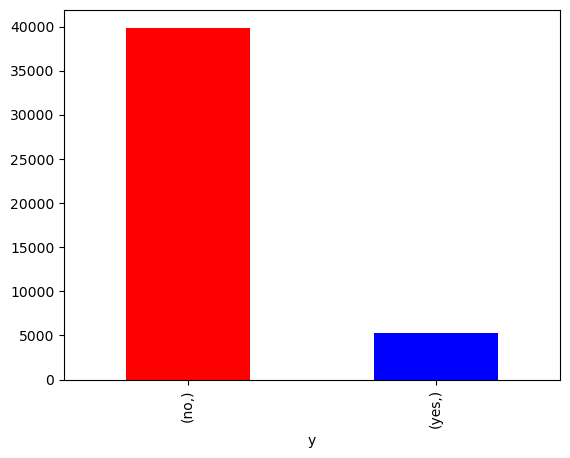

In [8]:
data.iloc[:, -1:].value_counts().plot.bar(color=['red', 'blue'])

In [9]:
# Select columns of type 'object'
object_columns = data.select_dtypes(include=['object'])

# Loop through each column and print unique categories
for column in object_columns:
    categories = data[column].unique()
    print(f"Categories for column '{column}': {categories}")

Categories for column 'job': ['blue-collar' 'unknown' 'management' 'admin.' 'technician' 'services'
 'retired' 'entrepreneur' 'self-employed' 'unemployed' 'housemaid'
 'student']
Categories for column 'marital': ['married' 'single' 'divorced']
Categories for column 'education': ['unknown' 'tertiary' 'secondary' 'primary']
Categories for column 'default': ['no' 'yes']
Categories for column 'housing': ['yes' 'no']
Categories for column 'loan': ['no' 'yes']
Categories for column 'contact': ['unknown' 'cellular' 'telephone']
Categories for column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Categories for column 'poutcome': ['unknown' 'failure' 'other' 'success']
Categories for column 'y': ['no' 'yes']


## __OUTLIERS ANALYSIS__

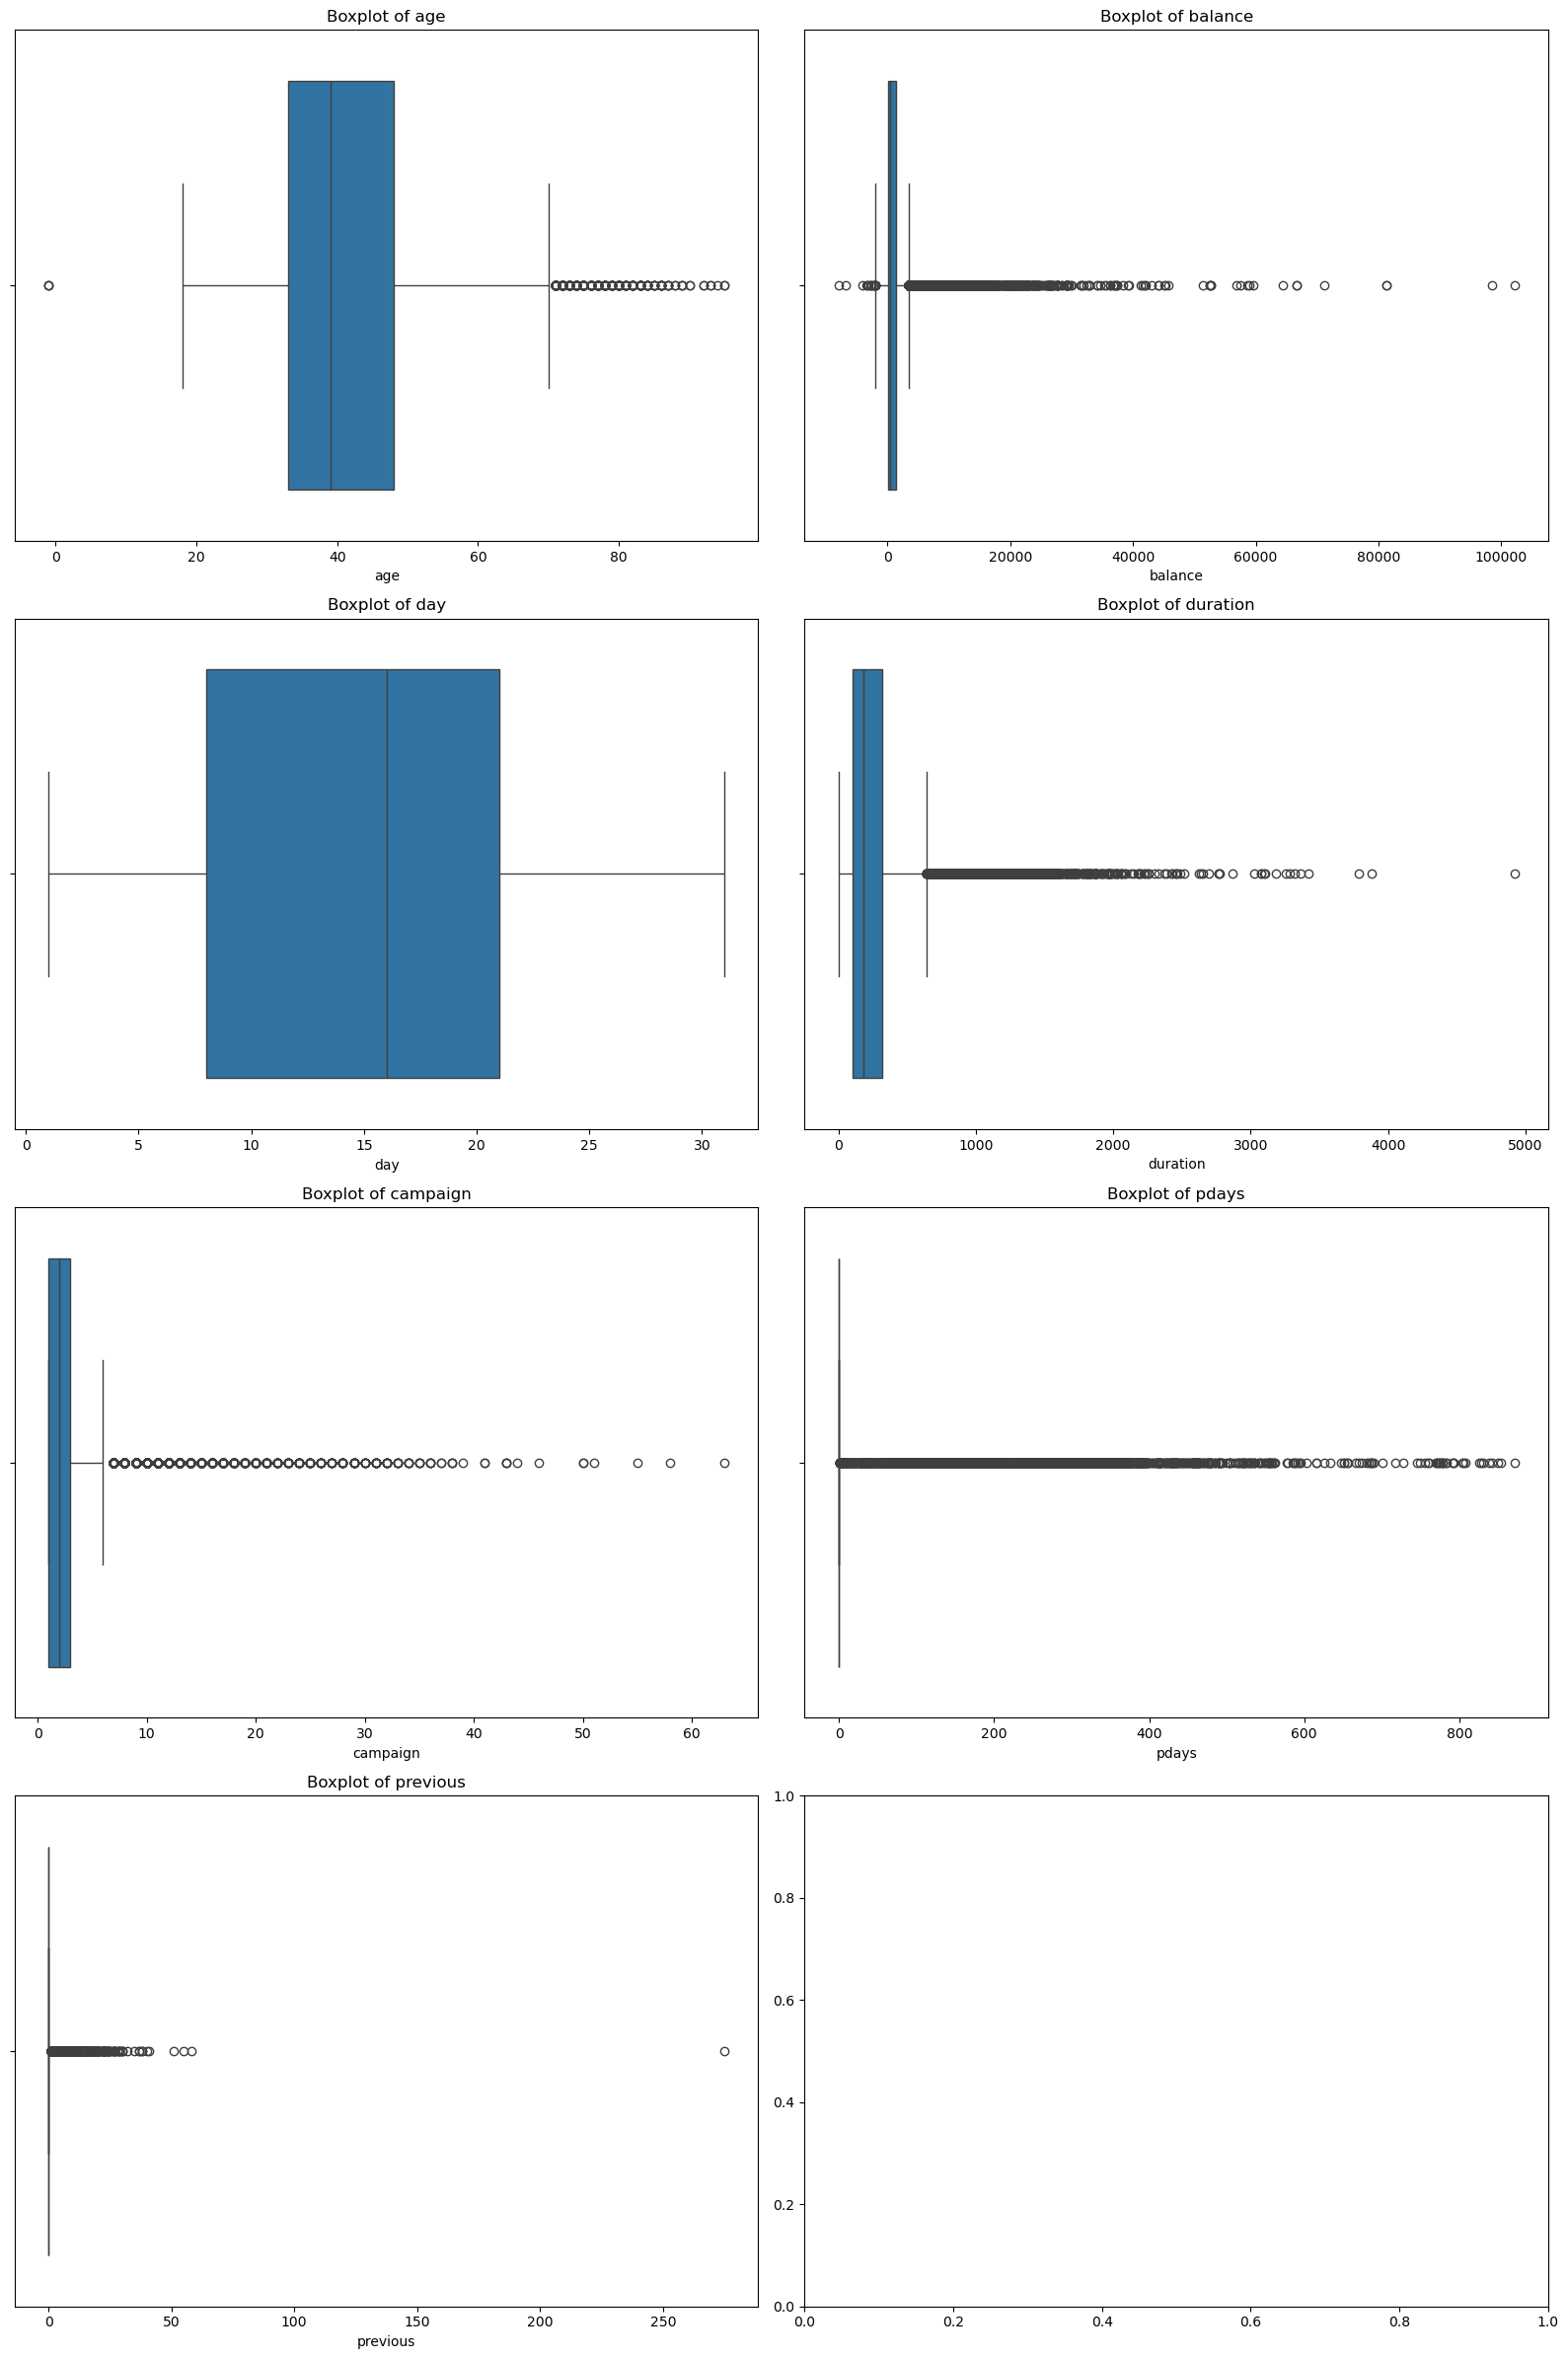

In [10]:
# Outliers analysis

# Calculate the number of rows and columns for subplots

# We can directly select numeric columns if you prefer
num_cols = data.select_dtypes(include='number').columns.tolist()

num_plots = len(num_cols)
num_rows = (num_plots + 1) // 2  # Add 1 and use integer division to round up
num_cols_subplot = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(16, 6*num_rows))

# Plot boxplots for each numeric column separately
for col, ax in zip(num_cols, axes.flat):
    sns.boxplot(data=data[col], ax=ax, orient='h')
    ax.set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# Treatment for outliers in 'campaign' and other variable in data

# Winsorization
def winsorize(series, lower=0.05, upper=0.95):
    lower_bound = series.quantile(lower)
    upper_bound = series.quantile(upper)
    return series.clip(lower=lower_bound, upper=upper_bound)

# Choose the column(s) you want to mitigate outliers for
columns_to_process = ['campaign','pdays']

# Apply winsorization
for col in columns_to_process:
    data[col] = winsorize(data[col])

In [12]:
# Robust treatment for outliers in other numeric variables


# Choose the column(s) you want to mitigate outliers for
columns_to_process = ['age','balance','duration']

# Define a function for Robust Winsorization
def robust_winsorize(series, lower=0.05, upper=0.95):
    median = series.median()
    mad = np.abs(series - median).median()
    lower_bound = median - 3 * mad
    upper_bound = median + 3 * mad
    return series.clip(lower=lower_bound, upper=upper_bound)

# Define a function for Tukey's fences
def tukeys_fences(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply robust winsorization and Tukey's fences
for col in columns_to_process:
    data[col] = robust_winsorize(data[col])
    data[col] = tukeys_fences(data[col])

# Check for outliers after treatment
for col in columns_to_process:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_count = np.sum((data[col] < lower_bound) | (data[col] > upper_bound))
    print(f"Number of outliers in '{col}' after treatment: {outliers_count}")

Number of outliers in 'age' after treatment: 0
Number of outliers in 'balance' after treatment: 0
Number of outliers in 'duration' after treatment: 0


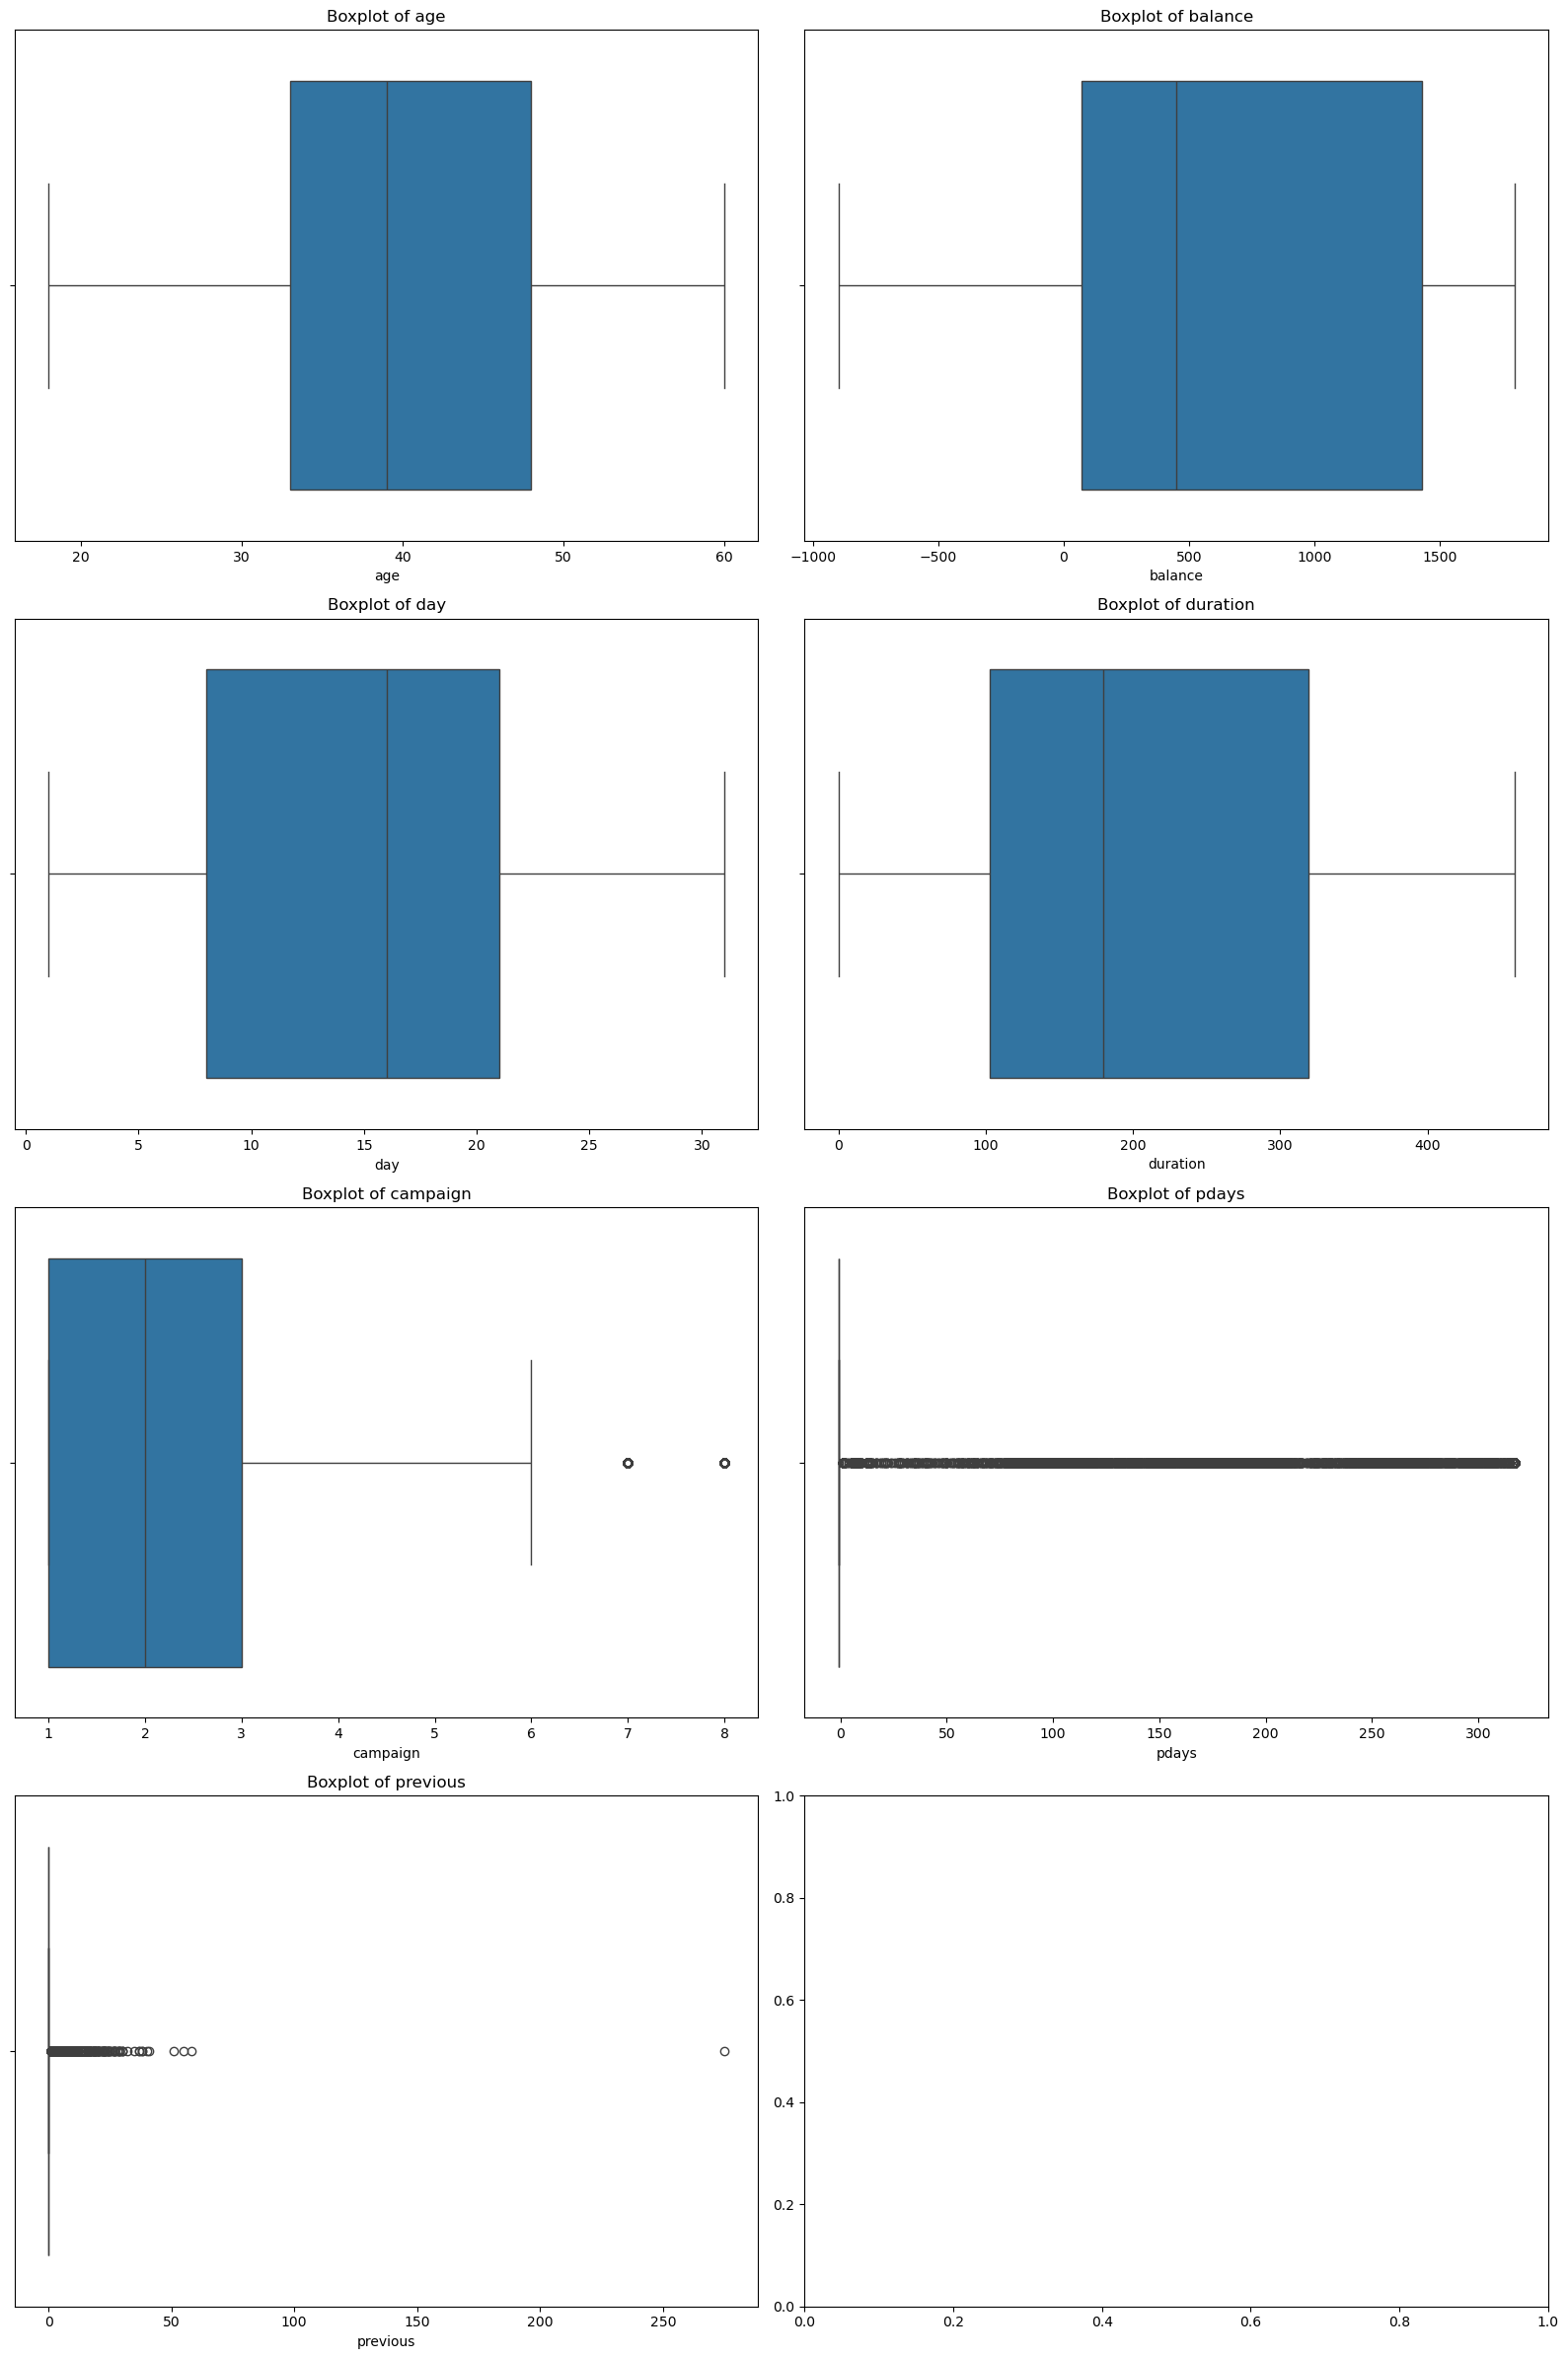

In [13]:
# Repeat outliers detection analysis

num_plots = len(num_cols)
num_rows = (num_plots + 1) // 2  # Add 1 and use integer division to round up
num_cols_subplot = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(16, 6*num_rows))

# Plot boxplots for each numeric column separately
for col, ax in zip(num_cols, axes.flat):
    sns.boxplot(data=data[col], ax=ax, orient='h')
    ax.set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

## __DATASET SPLIT__

First, let's split the dataset into a training and a testing dataset. Training dataset will be used to train and (maybe) tune models, and testing dataset will be used to evaluate the models. Note that I may also split the training dataset into train and validation sets where the validation dataset is only used to tune the model and to set the model parameters.

In [14]:
# Separate features and target
X = data.drop(columns=['y'])
y = data['y'].map({'no': 0, 'yes': 1})  # Convert target variable to integer

In [15]:
# Train/Test Split

# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 123)

#Let's look at the shapes of the split datasets:

print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

#X_df = pd.DataFrame(X_train)
#X_df.columns
#X_df

Training dataset shape, X_train: (31637, 16), y_train: (31637,)
Testing dataset shape, X_test: (13560, 16), y_test: (13560,)


## __FEATURE ENGINEERING__

Next, let's process the raw dataset and construct input data X and label/output y for logistic regression model training.

In [16]:
# Define preprocessor for numeric and categorical features
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [17]:
# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [18]:
# Fit and transform the training data, transform the validation data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [19]:
# Check the types and shapes of processed data
print(f"X_train_processed shape: {X_train_processed.shape}, dtype: {X_train_processed.dtype}")
print(f"X_test_processed shape: {X_test_processed.shape}, dtype: {X_test_processed.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")

X_train_processed shape: (31637, 51), dtype: float64
X_test_processed shape: (13560, 51), dtype: float64
y_train shape: (31637,), dtype: int64
y_test shape: (13560,), dtype: int64


## __CORRELATION ANALYSIS__

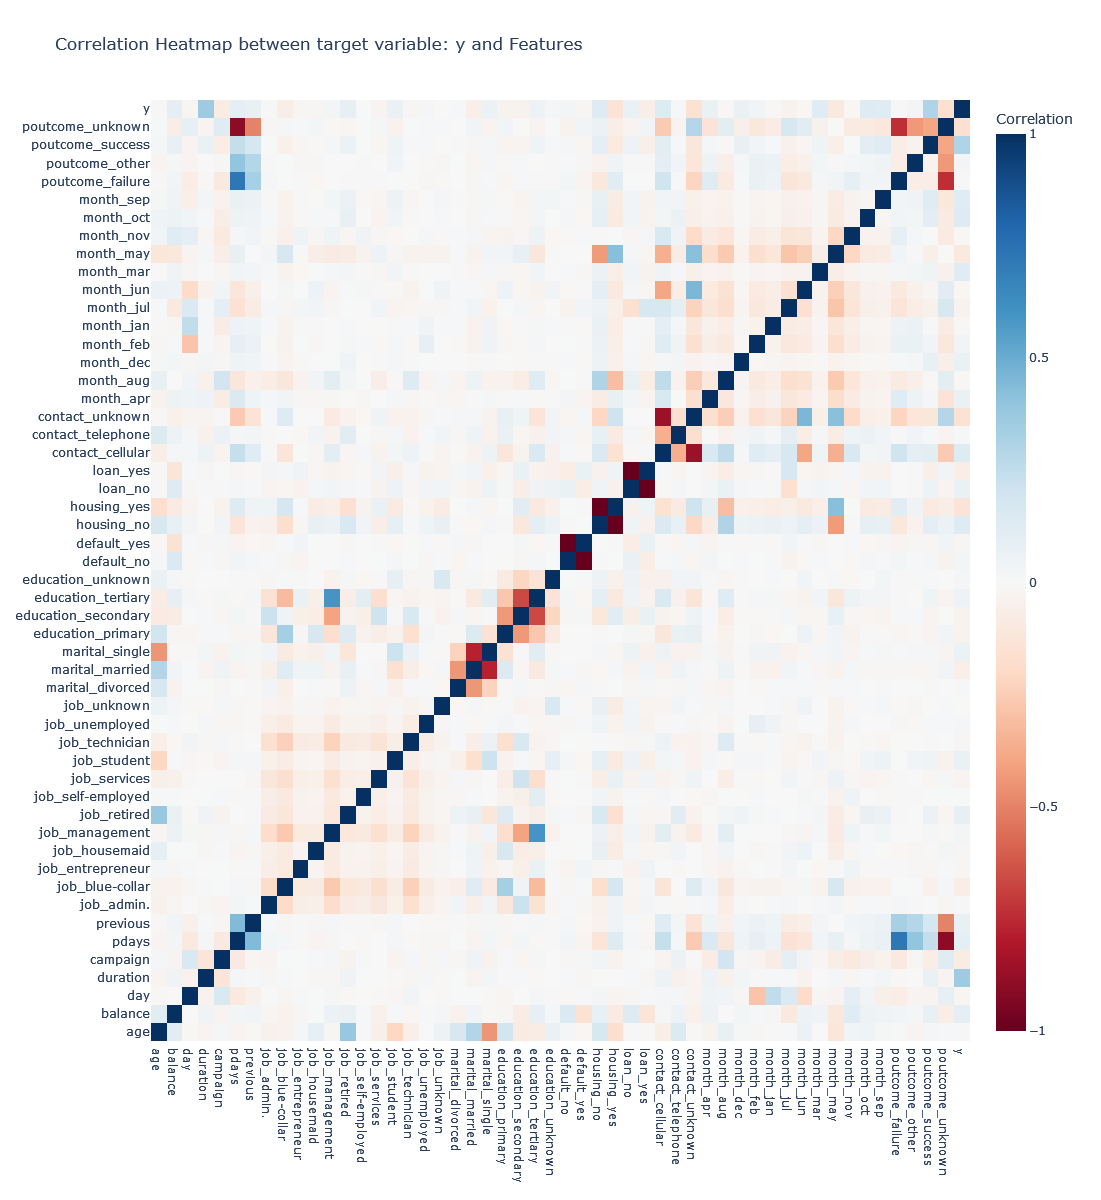

In [44]:
# Correlation Analysis between Features and target y

# Convert processed data back to DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))

# Add target variable back to DataFrame
X_train_df['y'] = y_train.reset_index(drop=True)

# Calculate the correlation matrix
correlation_matrix = X_train_df.corr()


# Plot heatmap with Plotly
# Create figure
fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale='RdBu',  # Choose a colorscale
        zmin=-1, zmax=1,  # Set min and max values for color scale
        colorbar=dict(title='Correlation'),
))

# Configure layout
fig.update_layout(
    title='Correlation Heatmap between target variable: y and Features',
    width=1000,  # Adjust width as needed
    height=1200,  # Adjust height as needed
    xaxis_nticks=len(correlation_matrix.columns),  # Adjust number of ticks on x-axis
    yaxis_nticks=len(correlation_matrix.index),  # Adjust number of ticks on y-axis
)

# Add hover info
fig.update_traces(hoverongaps=False, hovertemplate='x: %{x}<br>y: %{y}<br>Correlation: %{z:.2f}')

# Display figure
fig.show()

After exploring the correlations between the target variable and all the final variables involved once processing is done, which is useful to get an idea of those that could most influence the response variable, however, this introduces complexity into the model.

Logistic regression models can suffer from overfitting when the number of predictors (features) is large relative to the number of observations. Since I have many encoded categorical variables, each potentially introducing multiple new features (after one-hot encoding), the risk of overfitting is increased. It's essential to consider if all variables are necessary or if feature selection techniques (like regularization) could help.

__Regularization:__ Techniques like Lasso __(L1 regularization)__ or Ridge __(L2 regularization)__ regression can help mitigate overfitting by penalizing the coefficients of less important variables, effectively shrinking them towards zero. This encourages simpler models and reduces the impact of less relevant features.


## __BUILD LOGISTIC REGRESSION MODELS__

Now we have the training and testing datasets ready, let's start the model training task.

We first define a sklearn.linear_model.LogisticRegression model with the following arguments, you can check the comment for each argument for what it means.


## __Logistic Regression with L2 Penalty__

In [45]:
# Modeling Logistic Regression with L2 Penalty

from sklearn.linear_model import LogisticRegression

# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is binomial
multi_class = 'auto'
# Use lbfgs for L2 penalty and binomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000

In [46]:
# Check if the penalty type is valid
if penalty not in ['l1', 'l2']:
    raise ValueError("Invalid penalty type. Penalty must be 'l1' or 'l2'.")

In [48]:
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=123, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

Let's train the model with training input data `X_train_processed` and labels `y_train`:

In [49]:
l2_model.fit(X_train_processed, y_train)

C:\Users\jwhin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(max_iter=1000, multi_class='auto', random_state=123)

In [50]:
l2_preds = l2_model.predict(X_test_processed)

In [51]:
odd_ratios = l2_model.predict_proba(X_test_processed[:1, :])[0]
odd_ratios

array([0.99689981, 0.00310019])

The probability of belonging to class 0 is approximately 0.996, and the probability of belonging to class 1 is approximately 0.031

Since the probability of belonging to class 0 is higher, the model predicts the first sample as belonging to class 0.

When I directly call l2_model.predict(X_test[:1, :])[0], it returns the predicted class label for the first sample in X_test, which is 0 in this case.

So, in summary, the model predicts that the first sample in X_test belongs to class 0.

In [52]:
l2_model.predict(X_test_processed[:1, :])[0]

0

Define an utility method to take the ground truths y_test and the predictions preds, and return a Python dict with accuracy, recall, precision, and f1score.


In [53]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

## Performance Metrics for Logistic Regression with L2 Penalty

In [54]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.9008849557522124,
 'recall': array([0.9811242 , 0.29552615]),
 'precision': array([0.91309755, 0.67482014]),
 'f1score': array([0.94588936, 0.41104294])}

## __Logistic Regression with L1 Penalty__

Next, let's try defining another logistic regression model with l1 penality this time, to see if our classification performance would be improved.

In [55]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Our classification problem is multinomial
multi_class = 'auto'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

Then we define another logistic regression model with above arguments using l1 penality and related solver.

In [56]:
# Define a Logistic Regression model with arguments above
l1_model = LogisticRegression(random_state=123, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000)

We can start to train the new `l1_model` with the new training dataset.

In [57]:
l1_model.fit(X_train_processed, y_train)

C:\Users\jwhin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(max_iter=1000, multi_class='auto', penalty='l1',
                   random_state=123, solver='saga')

In [ ]:
# Making predictions with LR L1

In [58]:
l1_preds = l1_model.predict(X_test_processed)

In [ ]:
# Get Odd-Ratios

In [59]:
odd_ratios = l1_model.predict_proba(X_test_processed[:1, :])[0]
odd_ratios

array([0.99697217, 0.00302783])

In [60]:
l1_model.predict(X_test_processed[:1, :])[0]

0

Given the true labels (`y_test`) and predictions, we can evaluate the model performance by calling the utility `evaluate_metrics`  method.

## Performance Metrics for Logistic Regression with L1 Penalty

In [61]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.9006637168141592,
 'recall': array([0.98104067, 0.29426591]),
 'precision': array([0.91294886, 0.67291066]),
 'f1score': array([0.94577076, 0.40946953])}

Now, we can see this logistic regression with l1 penalty is pretty similar than l2.

###### As we can see from the above evaluation results, the logistic regression model has relatively good performance on this multinomial classification task. The overall accuracy is around 0.9 for L1 model and L2 model and the f1score is around 0.90 for both models as well. Note that for recall, precision, and f1score, we output the values for each class to see how the model performs on an individual class. And, we can see from the results, the recall for class=1 (More often) is not very good. This is actually a common problem called imbalanced classification challenge. I will test other alternatives  for the next steps.

## Confusion Matrix for Logistic Regression with L1 Penalty

We can also plot the confusion matrix based on the true labels and predictions using the `confusion_matrix` method provided by `sklearn`,

In [62]:
# Confusion Matrix for LR L1 model

cf = confusion_matrix(y_test, l1_preds, normalize='true')

and easily visualize it using a heatmap method provided by `seaborn`.

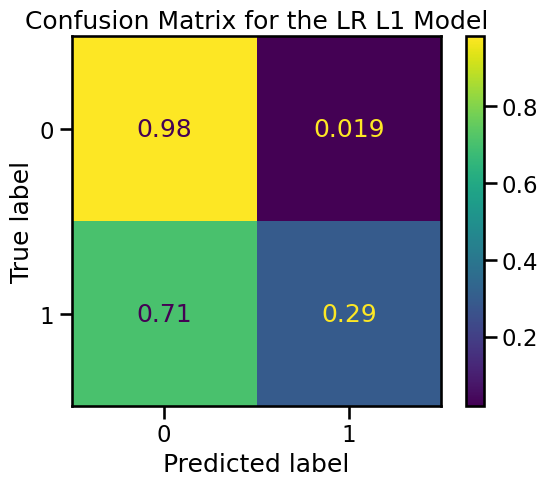

In [63]:
cf_LR_model = confusion_matrix(y_test, l1_preds, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf_LR_model, display_labels=l1_model.classes_)
disp.plot()
plt.title("Confusion Matrix for the LR L1 Model")
plt.show()

### __For many machine learning tasks on imbalanced datasets, like this dicothomous phenomena, it recommends care more about recall than precision. As a baseline, we want the model to be able to find all frauds and we would allow the model to make false-positive errors because the cost of false positives is usually not very high (maybe just costs a false notification email or phone call to confirm with customers). On the other hand, failing to recognize positive examples (such as fraud or a deadly disease) can be life-threatening__

### As such, our priority is to improve the model's recall, then we will also want to keep precision as high as possible.


## __ALTERNATE APPROACH TO DEALING WITH INTERST CLASS IMBALANCE__

## Synthetic Minority Oversampling Technique (SMOTE)

SMOTE first creates many pairs or small clusters with two or more similar instances, the measure by instance distance such as Euclidean distance.
Then, within the boundary of each pair or cluster, SMOTE uniformly permutes features value, one feature at a time, to populate a collection of similar synthesized instances within each pair or cluster.

As a result, __SMOTE creates a class-balanced synthetic dataset without adding duplicated instances with minority labels.__ 


In [64]:
# Logistic Regression Modeling with SMOTE Technique

from imblearn.over_sampling import RandomOverSampler, SMOTE

# Create a SMOTE sampler
smote_sampler = SMOTE(random_state = 123)

# Resample training data using SMOTE
X_smo, y_smo = smote_sampler.fit_resample(X_train_processed, y_train)

After SMOTE resampling, we can see both positive and negative class has the same instances

<Axes: xlabel='y'>

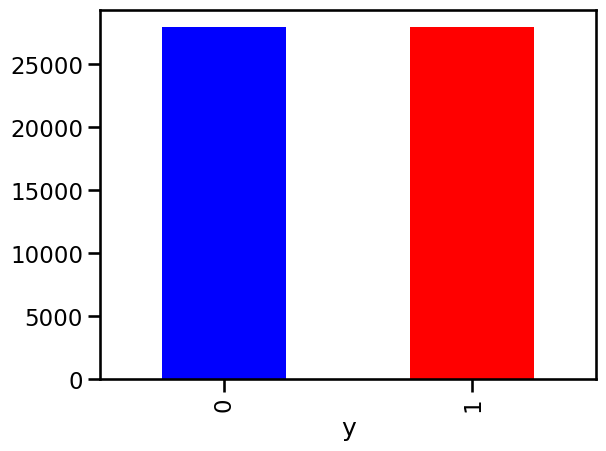

In [65]:
# Visualize classes after applying SMOTE treatment

# Convert NumPy array to Pandas Series
y_smo_series = pd.Series(y_smo)

y_smo_series.value_counts().plot.bar(color=['blue', 'red'])

## __Logistic Regression L1 with SMOTE Treatment__

In [66]:
# Re-train the L1 model with resampled data with SMOTE

l1_model.fit(X_smo, y_smo)


C:\Users\jwhin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(max_iter=1000, multi_class='auto', penalty='l1',
                   random_state=123, solver='saga')

In [ ]:
# Get Odd-ratios

In [67]:
odd_ratios = l1_model.predict_proba(X_test_processed[:1, :])[0]

odd_ratios

array([0.99201183, 0.00798817])

In [ ]:
# Make predictions

In [68]:
y_preds_smote = l1_model.predict(X_test_processed)

## Performance Metrics for Logistic Regression L1 with SMOTE Treatment

In [69]:
# Check the accuracy score, recall, precision and f1 score

evaluate_metrics(y_test, y_preds_smote)

{'accuracy': 0.8116519174041298,
 'recall': array([0.81007266, 0.82356648]),
 'precision': array([0.97194108, 0.36498185]),
 'f1score': array([0.88365525, 0.50580495])}

After resampling the data, I retrained my model (l1_model) using the resampled data. This allows the model to learn from a more balanced dataset and potentially improve its performance, especially in terms of recall for the minority class.

The accuracy score of the model on the test set is approximately 0.82, indicating that around 82% of the predictions made by the model are correct. 

While accuracy is an important metric, it may not provide a complete picture, especially in imbalanced datasets.

### Let's have a detailed summary. So I provide Precision, Recall, and F1 score.

In [70]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

accuracy = accuracy_score(y_test, y_preds_smote)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_preds_smote, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_preds_smote)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")


Accuracy is: 0.81
Precision is: 0.36
Recall is: 0.82
Fscore is: 0.79
AUC is: 0.82


## Confusion Matrix for Logistic Regression L1 with SMOTE Treatment

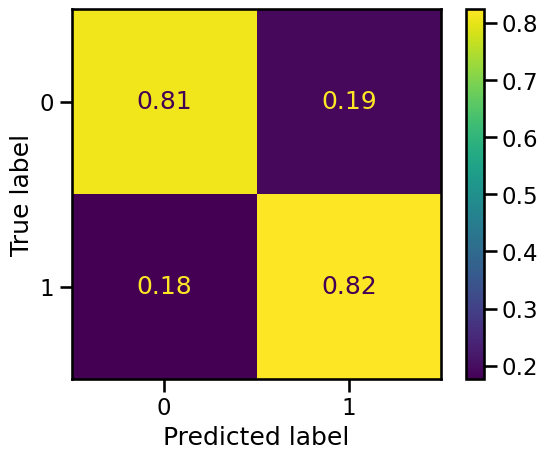

In [71]:
# Confussion Matrix for the balanced target variable with SMOTE

cf_balancedmodel = confusion_matrix(y_test, y_preds_smote, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf_balancedmodel,display_labels=l1_model.classes_)
disp.plot()
plt.show()

### __Overall, it seems that the model trained on the resampled data has achieved a higher recall compared to the previous model, indicating an improvement in detecting positive examples (e.g., successful marketing outcomes).__

Additionally, further analysis and fine-tuning of the model may be necessary to optimize its performance.

## __ALTERNATE APPROACH #2 TO DEALING WITH INTEREST CLASS IMBALANCE__

## Determining Parameters for Adjusted Class Weights (LR_ACW)

In [72]:
#  LR model variant with adjusted class weights

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def get_optimized_class_weights(X_train_processed, y_train):
    # Define a grid search to find optimized class weights
    param_grid = {
        'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}]  # Example weight combinations
    }
    
    # Initialize logistic regression model
    lr = LogisticRegression(random_state=42, max_iter=1000)
    
    # Initialize GridSearchCV with logistic regression model and parameter grid
    grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
    
    # Fit the grid search to the data
    grid_search.fit(X_train_processed, y_train)
    
    # Get the best parameters from the grid search
    best_params = grid_search.best_params_
    
    # Return the optimized class weights
    return best_params['class_weight']



In [73]:
# Obtain optimized class weights using grid search
optimized_class_weights = get_optimized_class_weights(X_train_processed, y_train)


## __Logistic Regression Modeling with Adjusted Class Weights (LR_ACW)__

In [74]:
# Initialize logistic regression model with optimized class weights
lr_acw = LogisticRegression(random_state=42, max_iter=1000, class_weight=optimized_class_weights)

In [75]:
# Re-train the model with re-weighted data

lr_acw.fit(X_train_processed, y_train)


LogisticRegression(class_weight={0: 0.3, 1: 0.7}, max_iter=1000,
                   random_state=42)

In [76]:
y_pred_acw = lr_acw.predict(X_test_processed)

## Performance Metrics for Logistic Regression L1 with with Adjusted Class Weights (LR_ACW)

In [77]:
# Check the accuracy score, recall, precision and f1 Score per Class

evaluate_metrics(y_test, y_pred_acw)

{'accuracy': 0.8797935103244838,
 'recall': array([0.92149002, 0.56521739]),
 'precision': array([0.94114135, 0.48829614]),
 'f1score': array([0.93121202, 0.5239486 ])}

In [78]:
# Check the accuracy score, recall, precision and f1 Score Overall

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_acw)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred_acw, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred_acw)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")


Accuracy is: 0.88
Precision is: 0.49
Recall is: 0.57
Fscore is: 0.56
AUC is: 0.74


## Confusion Matrix for Logistic Regression L1 with Adjusted Class Weights

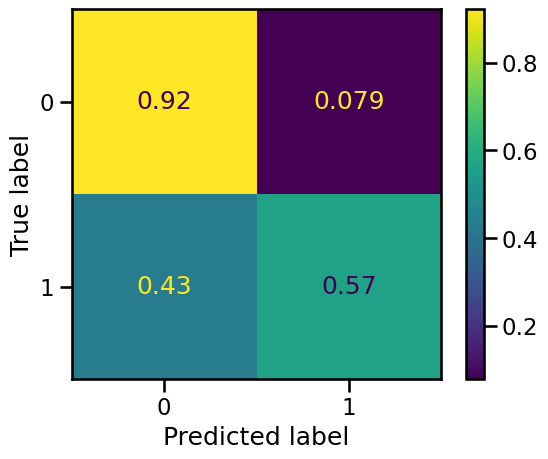

In [79]:
# Confussion Matrix for the re-weighted model

cf_balancedmodel = confusion_matrix(y_test, y_pred_acw, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf_balancedmodel,display_labels=lr_acw.classes_)
disp.plot()
plt.show()

Considering these metrics, it seems that the Logistic Regression model with SMOTE is better suited for prediction and classification purposes in this scenario. It achieves a better balance between precision and recall, resulting in a higher F1 score and AUC compared to the model with re-weighting. 

In summary, if correctly identifying positive cases with minimal false negatives is more important, the logistic regression with SMOTE might be preferred. 

## __INTERPRETING LOGISTIC REGRESSION MODELS__

### Once I have choosen __the LR model with smote treatment.__ One way to interpret logistic regression models is by analyzing feature coefficients. Although it may not be as effective as the regular linear regression models because the logistic regression model has a sigmoid function, we can still get a sense for the importance or impact of each feature.  

We can check the coefficients for logistic regression model using its `coef_` attribute:

In [80]:
l1_model.coef_

array([[-2.75568648e-01,  5.93401802e-01,  2.14680248e-01,
         5.56846728e+00, -8.16465447e-01, -1.06322281e+00,
         6.06236279e-01,  3.74680277e-01, -5.63783463e-04,
        -3.32843682e-01, -5.71114672e-01,  2.94387368e-02,
         6.03972605e-01, -2.60172572e-01,  1.28566361e-04,
         1.01062054e+00, -8.66481439e-03,  2.21333921e-02,
        -6.38196957e-01,  0.00000000e+00, -2.26182829e-01,
         4.04014573e-02, -2.11098426e-01, -5.56480569e-02,
         2.10100917e-01,  1.20717727e-03,  7.82762664e-04,
        -5.94904181e-01,  7.70041855e-04, -7.01282409e-01,
         1.07878633e-03, -5.47731914e-01,  1.35550617e-01,
         0.00000000e+00, -1.40468824e+00,  8.34122668e-04,
        -9.15493306e-01,  2.40386022e-01, -1.31816181e-01,
        -1.66696071e+00, -1.14752266e+00,  1.32315696e-01,
         1.98459152e+00, -7.91098938e-01, -1.22866453e+00,
         1.50626512e+00,  9.43812062e-01, -3.22461734e-02,
         9.25447463e-06,  2.40795759e+00, -8.36089405e-0

The `coef_` is a coefficients list with two elements, one element is the actual coefficent for class 0, 1. To better analyze the coefficients, let's use three utility methods to sort and visualize them.

In [81]:
def get_feature_coefs(l1_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(l1_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

In [82]:
# Extract and sort feature coefficients
def get_feature_coefs(l1_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(l1_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

## Visualizing Logistic Regression Coefficients

Then, let's visualize the sorted coefficient for class 1, the Less Often class:


In [91]:
# Get the coefficents for Class 1HowHHH

# Define feature_cols with the names of your features
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 
                'housing', 'loan', 'contact', 'day', 'month', 'duration', 
                'campaign', 'pdays', 'previous', 'poutcome']

# Get the coefficients for the positive class (class 1)
label_index = 0

coef_dict = get_feature_coefs(l1_model, label_index, feature_cols)

# Print the coefficients dictionary
print(coef_dict)

{'balance': -1.0632228050001766, 'default': -0.8164654474960382, 'month': -0.5711146721853226, 'day': -0.33284368178290163, 'age': -0.2755686476020007, 'pdays': -0.2601725724319589, 'duration': 0.02943873683822397, 'marital': 0.21468024763557278, 'loan': 0.37468027663181575, 'job': 0.5934018024320893, 'campaign': 0.6039726051157874, 'housing': 0.6062362787915747, 'poutcome': 1.0106205357512628, 'education': 5.568467275889428}


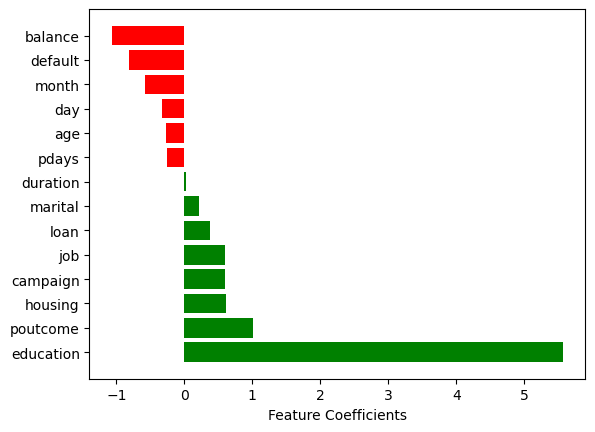

In [92]:
visualize_coefs(coef_dict)

## Interpreting the coeficients and Odds-ratios



__Odds Ratios:__
An odds ratio represents the likelihood of an event occurring given a certain condition compared to the likelihood of the same event occurring without that condition. In logistic regression, odds ratios are derived from the predicted probabilities of the target variable being in a certain class.

In this case, the odds ratios are array([0.99201183, 0.00798817]). This means that the odds of the event (class 1) occurring are 0.99201183 / 0.00798817 = ~124 times higher than the odds of the event not occurring (class 0).

Based on the coefficients provided, here's an interpretation of some of the features:

__Housing:__ Having a housing loan increases the log-odds of contracting new products and services by approximately 0.61 units.

__Poutcome:__ A successful previous marketing campaign increases the log-odds of contracting new products and services by approximately 1.01 units.

__Education:__ Higher education levels significantly increase the log-odds of contracting new products and services. The specific increase depends on the education level.




Here an alternative strategie to improve recall while maintaining a high precision:

Some algorithms are inherently better at handling imbalanced datasets and prioritizing recall, such as Random Forest, Gradient Boosting, or Support Vector Machines. Experimenting with different algorithms may yield better results.

## __CONCLUSIONS__

### Considering the business objective of predicting the probability that customers will contract new financial products during campaign events, the choice of model depends on the specific cost associated with misclassifications. If the cost of missing a potential customer (false negative) is high, a model with a high recall should be chosen. In this context, __Logistic Regression L1 with SMOTE technique is recommended due to its high recall values__.

### On the other hand, the higher impact of education on y in my logistic regression results compared to its correlation coefficient suggests that logistic regression captures nuances and interactions that simple correlation analysis may miss.

### Here other alternative strategies that might improve recall while maintaining a high precision  should be considered as well: 
### Some algorithms are inherently better at handling imbalanced datasets and prioritizing recall, such as Random Forest, Gradient Boosting, or Support Vector Machines. Experimenting with different algorithms may yield better results.
